In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
df.drop("Product_Category_2",axis=1,inplace=True)
df.drop("Product_Category_3",axis=1,inplace=True)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Analyse the columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [9]:
df["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
df["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [11]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [12]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [17]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [18]:
df["Purchase"].sum()

5017668378

In [19]:
df["Purchase"].sum()/len(df["Purchase"])

9333.859852635065

In [20]:
for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# Analysing Gender

In [21]:
df["Gender"].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

<Axes: ylabel='count'>

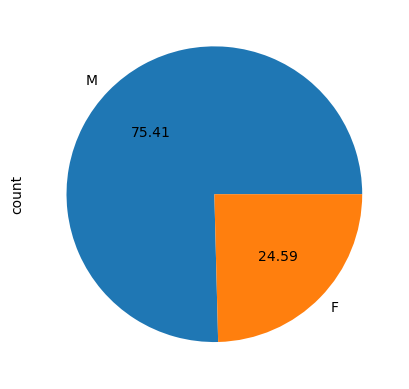

In [22]:
df["Gender"].value_counts().plot(kind="pie",autopct="%0.2f")

<Axes: xlabel='Gender'>

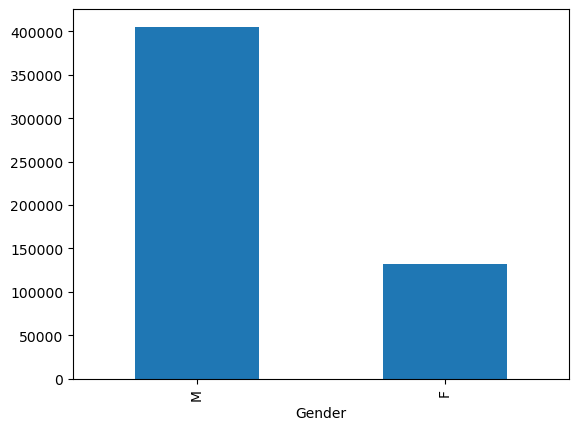

In [23]:
df["Gender"].value_counts().plot(kind="bar")

In [24]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: >

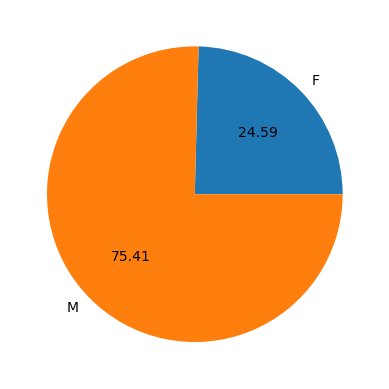

In [25]:
df.groupby("Gender").size().plot(kind="pie",autopct="%0.2f")

In [26]:
df["Gender"].nunique()

2

df.groupby("Gender").sum()["Purchase"]

# Analysing Age and Maital Status

In [27]:
df["Age"].nunique()

7

In [28]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<Axes: xlabel='Age'>

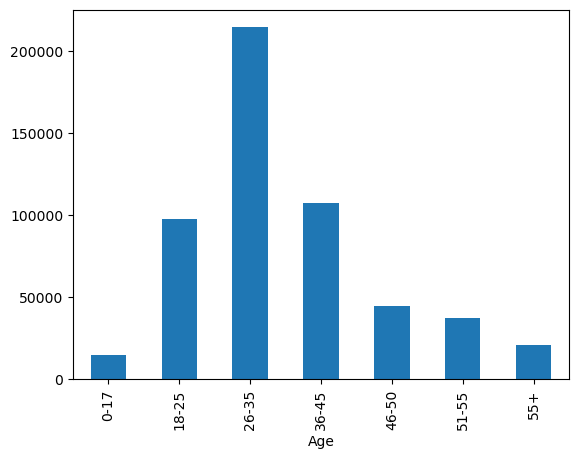

In [29]:
df.groupby("Age").size().plot(kind="bar")

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

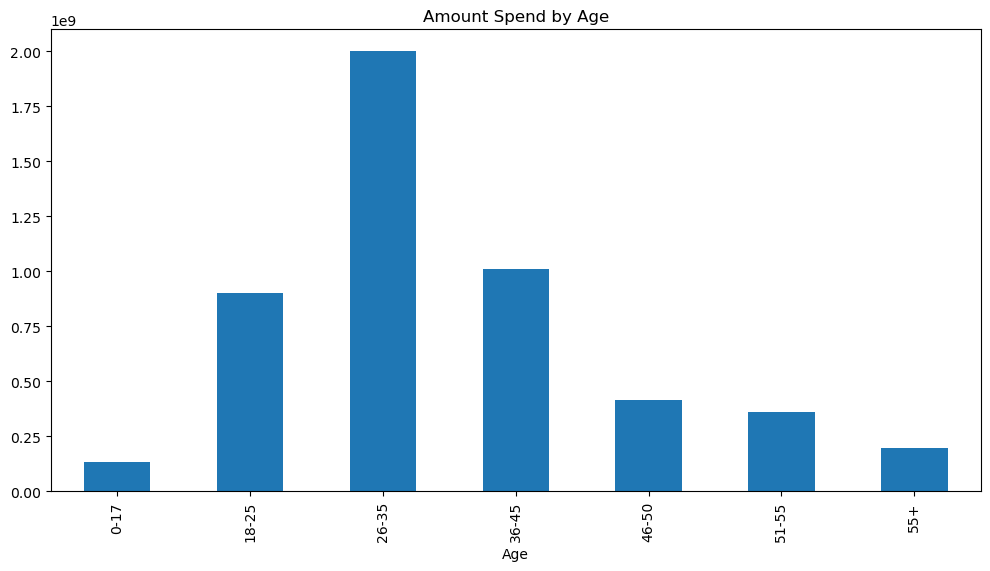

In [30]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

In [31]:
df.groupby("Age").count()["Product_Category_1"]

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Product_Category_1, dtype: int64

In [32]:
df.groupby("Age").count()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
Age,,,,,,,,,
0-17,14707,14707,14707,14707,14707,14707,14707,14707,14707
18-25,97634,97634,97634,97634,97634,97634,97634,97634,97634
26-35,214690,214690,214690,214690,214690,214690,214690,214690,214690
36-45,107499,107499,107499,107499,107499,107499,107499,107499,107499
46-50,44526,44526,44526,44526,44526,44526,44526,44526,44526
51-55,37618,37618,37618,37618,37618,37618,37618,37618,37618
55+,20903,20903,20903,20903,20903,20903,20903,20903,20903


<Axes: >

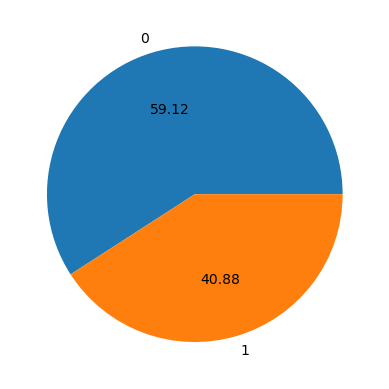

In [33]:
df.groupby("Marital_Status").size().plot(kind="pie",autopct="%0.2f")

In [3]:
df["Age"].idxmax()

4

In [4]:
df.loc[df["Age"].idxmax(),"City_Category"]

'C'

In [5]:
df.groupby("Age").size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

In [6]:
df.groupby("Age").idxmax()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,,,,,
0-17,38970,84609,85,4526,299,423,0,6793,2242,7850,388010
18-25,39104,146596,97,726,127,98,262,3207,5422,926,229329
26-35,39169,357938,5,9,19,19,9,304,2405,142,87440
36-45,39094,324997,18,335,55,29,18,2167,1301,837,503697
46-50,39161,52822,6,1434,52,189,6,2781,3448,2565,292083
51-55,39113,19326,67,868,67,333,333,796,2802,6059,349658
55+,155550,65948,4,2322,4,4,451,1559,10086,1560,321782


In [8]:
df.groupby(["City_Category","Age"]).size()

City_Category  Age  
A              0-17      2497
               18-25    27025
               26-35    72048
               36-45    26142
               46-50     7467
               51-55     5969
               55+       3490
B              0-17      5288
               18-25    42470
               26-35    89767
               36-45    46605
               46-50    19900
               51-55    17435
               55+       5028
C              0-17      6922
               18-25    28139
               26-35    52875
               36-45    34752
               46-50    17159
               51-55    14214
               55+      12385
dtype: int64

In [9]:
df.groupby(["Age","City_Category"]).max()

User_ID Product_ID Gender  Occupation  \
Age   City_Category                                          
0-17  A              1005302   P0099842      M          19   
      B              1005953   P0099742      M          19   
      C              1006006   P0099742      M          19   
18-25 A              1006028   P0099942      M          20   
      B              1005998   P0099942      M          20   
      C              1006031   P0099842      M          20   
26-35 A              1006034   P0099942      M          20   
      B              1006040   P0099842      M          20   
      C              1006035   P0099842      M          20   
36-45 A              1005879   P0099942      M          20   
      B              1006017   P0099942      M          20   
      C              1006026   P0099842      M          20   
46-50 A              1006032   P0099842      M          20   
      B              1006039   P0099842      M          20   
      C              1006037   P0099842      M          20   
51-55 A              1006020   P0099742      M          20   
      B              1006033   P0099942      M          20   
      C              1006002   P0099942      M          20   
55+   A              1005968   P0099942      M          17   
      B              1005986   P0099942      M          20   
      C              1006038   P0099842      M          20   

                    Stay_In_Current_City_Years  Marital_Status  \
Age   City_Category                                              
0-17  A                                      3               0   
      B                                     4+               0   
      C                                     4+               0   
18-25 A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   
26-35 A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   
36-45 A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   
46-50 A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   
51-55 A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   
55+   A                                     4+               1   
      B                                     4+               1   
      C                                     4+               1   

                     Product_Category_1  Product_Category_2  \
Age   City_Category                                           
0-17  A                              18                18.0   
      B                              18                18.0   
      C                              18                18.0   
18-25 A                              18                18.0   
      B                              18                18.0   
      C                              18                18.0   
26-35 A                              18                18.0   
      B                              18                18.0   
      C                              18                18.0   
36-45 A                              18                18.0   
      B                              18                18.0   
      C                              18                18.0   
46-50 A                              18                18.0   
      B                              18                18.0   
      C                              18                18.0   
51-5

In [11]:
df.loc[df.groupby("Age")["City_Category"].idxmax()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
299,1000051,P00361842,F,0-17,10,C,2,0,15,16.0,NaN,17271
127,1000025,P00206442,M,18-25,4,C,4+,0,1,5.0,9.0,15361
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
55,1000014,P00276642,M,36-45,0,C,0,0,8,11.0,NaN,5848
52,1000013,P00129542,M,46-50,1,C,3,1,8,14.0,NaN,5839
67,1000017,P00019342,M,51-55,1,C,0,0,1,6.0,15.0,15872
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [19]:
df[df["Age"]=="0-17"].idxmax()

User_ID                        38970
Product_ID                     84609
Gender                            85
Age                                0
Occupation                      4526
City_Category                    299
Stay_In_Current_City_Years       423
Marital_Status                     0
Product_Category_1              6793
Product_Category_2              2242
Product_Category_3              7850
Purchase                      388010
dtype: int64